# Lab | Imbalanced data

---------------------------------------------------------------------------------------------------
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

--------------------------------------------------------------------------------------------------

### Instructions

#### 1. Load the dataset and explore the variables.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Importing the csv file into a varieble
df = pd.read_csv("C:\\Users\\mafal\\Documents\\ironhack\\labs\\lab-imbalanced-data\\files_for_lab\\customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

##### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
#Importing necessary libraries
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [12]:
df_copy = df

In [15]:
columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges']

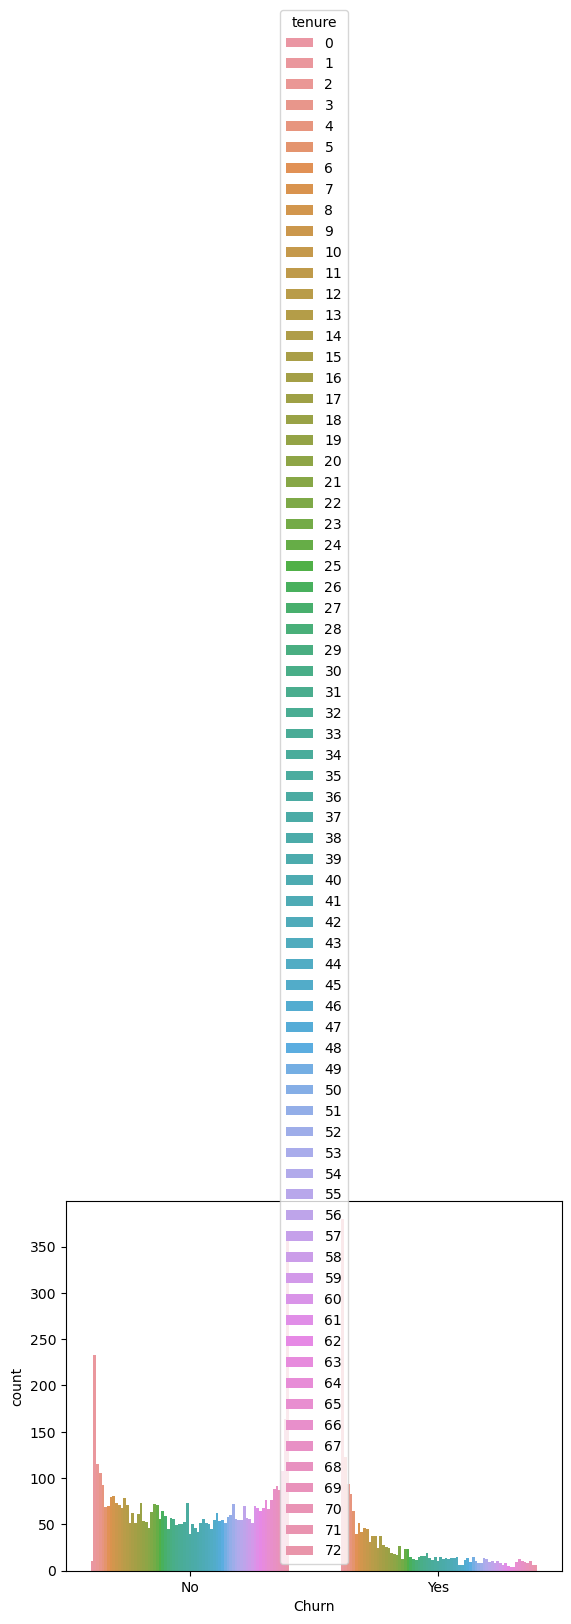

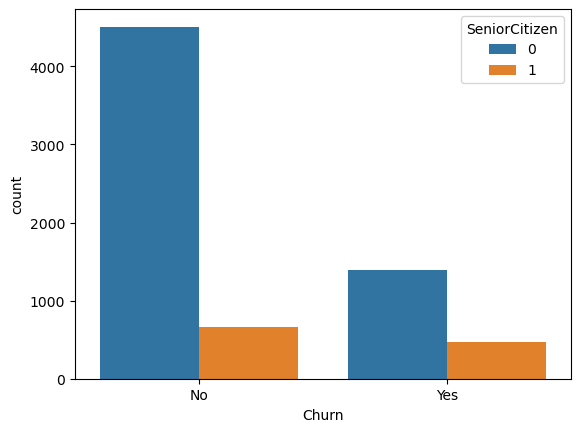

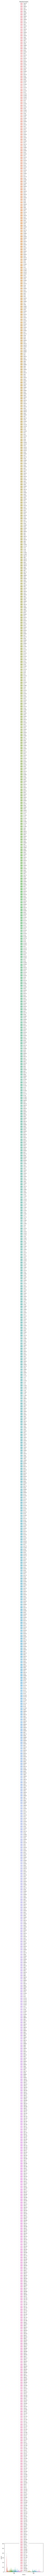

In [16]:
for col in columns:
    # Create a count plot
    sns.countplot(x="Churn", hue=col, data=df_copy)
    plt.show()

##### 3. Extract the target variable.

##### 4. Extract the independent variables and scale them.

In [20]:
df_copy = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']].copy()
df_copy

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


##### 5. Build the logistic regression model.

In [21]:
X = pd.get_dummies(df_copy.drop('Churn', axis=1)) # watch out! rookie mistake: DO NOT dummify the target variable
y = df_copy['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [22]:
df2 = df_copy

In [23]:
#Using normalizer instead
scaler = Normalizer()

X = pd.get_dummies(df2.drop('Churn', axis=1))
X_scaled = scaler.fit_transform(X)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.87      0.85      1035
         Yes       0.58      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [24]:
df3 = df_copy

In [25]:
#Using StandarScaler
scaler = StandardScaler()

X = pd.get_dummies(df3.drop('Churn', axis=1))
y = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



----------------------------------------------------------------------------------------
We got very similar results but we'll use the StandarScaler predictions

----------------------------------------------------------------------------------------

##### 6. Evaluate the model.

<Axes: >

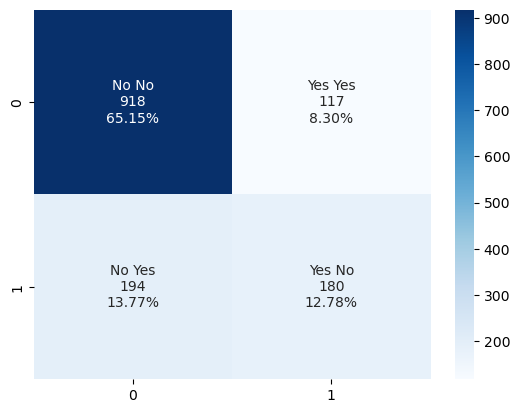

In [26]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['No No', 'Yes Yes',
              'No Yes', 'Yes No']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### 7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [27]:
from imblearn.over_sampling import SMOTE

# Assuming X represents your feature matrix and y represents your target variable
# Perform the splitting of the dataset into X and y here

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply the SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Optional: Convert the resampled data back to a DataFrame, if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

In [28]:
print(X_resampled_df)

       tenure  SeniorCitizen  MonthlyCharges
0           1              0       29.850000
1          34              0       56.950000
2           2              0       53.850000
3          45              0       42.300000
4           2              0       70.700000
...       ...            ...             ...
10343       4              0       78.966131
10344       1              0       40.111636
10345       9              0       45.381666
10346       7              0       19.843476
10347      11              1       84.115553

[10348 rows x 3 columns]


In [29]:
print(y_resampled_df)

0         No
1         No
2        Yes
3         No
4        Yes
        ... 
10343    Yes
10344    Yes
10345    Yes
10346    Yes
10347    Yes
Name: Churn, Length: 10348, dtype: object


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

